In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [31]:
df = pd.read_csv('ds_salary_clean.csv')

In [32]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist Intern- Summer,$71K-$117K (Glassdoor est.),"Delivering one-of-a-kind cloud technology, acc...",4.3,Paylocity\n4.3,"Schaumburg, IL",-1,1001 to 5000 Employees,1997,Company - Public,...,94.0,Paylocity\n,IL,0,23,1,0,0,1,0
1,Data Scientist Intern- Summer 2021 (Remote),$71K-$117K (Glassdoor est.),"Delivering one-of-a-kind cloud technology, acc...",4.3,Paylocity\n4.3,"Schaumburg, IL",-1,1001 to 5000 Employees,1997,Company - Public,...,94.0,Paylocity\n,IL,0,23,1,0,0,1,0
2,Data Scientist,$71K-$117K (Glassdoor est.),DATA SCIENTIST JOB DESCRIPTION\nWe are looking...,1.4,"Sickle Cell Disease Association of America, In...","Hanover, MD",-1,1 to 50 Employees,-1,Nonprofit Organization,...,94.0,"Sickle Cell Disease Association of America, In...",MD,0,-1,0,0,0,0,1
3,Data Scientist,$71K-$117K (Glassdoor est.),STRATACACHE provides salable customer experien...,3.6,STRATACACHE\n3.6,"Dayton, OH",-1,201 to 500 Employees,1999,Company - Private,...,94.0,STRATACACHE\n,OH,0,21,1,0,0,0,1
4,Marketing Data Analyst,$71K-$117K (Glassdoor est.),Overview:\nCan you work in a relationship with...,4.2,Idaho Central Credit Union\n4.2,"Chubbuck, ID",-1,1001 to 5000 Employees,1940,Nonprofit Organization,...,94.0,Idaho Central Credit Union\n,ID,0,80,0,0,0,0,1


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job Title                 200 non-null    object 
 1   Salary Estimate           200 non-null    object 
 2   Job Description           200 non-null    object 
 3   Rating                    200 non-null    float64
 4   Company Name              200 non-null    object 
 5   Location                  200 non-null    object 
 6   Headquarters              200 non-null    int64  
 7   Size                      200 non-null    object 
 8   Founded                   200 non-null    int64  
 9   Type of ownership         200 non-null    object 
 10  Industry                  200 non-null    object 
 11  Sector                    200 non-null    object 
 12  Revenue                   200 non-null    object 
 13  Competitors               200 non-null    int64  
 14  hourly    

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    elif 'intern' in title.lower():
        return 'intern'
    else:
        return 'na'
    
   

In [86]:
 ## Job title and seniority
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [87]:
df.job_simplified.value_counts()

data scientist    103
analyst            75
na                 15
director            5
manager             1
data engineer       1
Name: job_simplified, dtype: int64

In [88]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        160
intern     21
senior     19
Name: seniority, dtype: int64

In [23]:
## Fix state Los Angeles
#df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

 VA    20
 MA    19
 CA    18
 IL    17
 TX    13
 MD    10
 WI     8
 WA     8
 NY     8
 DC     7
 NJ     7
 OH     6
 PA     6
 MO     6
 FL     6
 TN     3
 MN     3
 GA     3
 UT     3
 AZ     2
 NC     2
 MI     2
 KS     1
 AL     1
 SC     1
 WY     1
 KY     1
 IN     1
 OR     1
 NM     1
 ID     1
 OK     1
Name: job_state, dtype: int64

In [67]:
# Job description length
df['dsc_len'] = df['Job Description'].apply(lambda x: len(x))
df['dsc_len']

0      3902
1      3902
2      3729
3      7428
4      4717
       ... 
195    2084
196    2702
197    3264
198    4057
199    2314
Name: dsc_len, Length: 200, dtype: int64

In [38]:
## Competitor count
def competitor_count(num):
    if num != -1:
        return 1
    else:
        return 0
    
df['num_comp'] = df['Competitors'].apply(competitor_count)

In [40]:
df['num_comp']

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: num_comp, Length: 200, dtype: int64

In [47]:
## hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [48]:
df['min_salary']

0      71
1      71
2      71
3      71
4      71
       ..
195    78
196    78
197    78
198    78
199    78
Name: min_salary, Length: 200, dtype: int64

In [46]:
df[['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,71,117
1,0,71,117
2,0,71,117
3,0,71,117
4,0,71,117
...,...,...,...
195,0,78,124
196,0,78,124
197,0,78,124
198,0,78,124


In [49]:
 ## remove new line from job title

In [51]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [52]:
df['company_txt']

0                                             Paylocity
1                                             Paylocity
2      Sickle Cell Disease Association of America, Inc.
3                                           STRATACACHE
4                            Idaho Central Credit Union
                             ...                       
195                                    Sony PlayStation
196                                             Novetta
197                                      Analog Devices
198                                              ViaSat
199                       Systems & Technology Research
Name: company_txt, Length: 200, dtype: object

In [53]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided_salary,min_salary,max_salary,avg salary,same_state,age,python_yn,R_yn,spark,aws,excel,num_comp
count,200.000000,200.0,200.000000,200.0,200.0,200.0,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.0
mean,3.656000,-1.0,1843.820000,-1.0,0.0,0.0,70.730000,118.680000,94.705000,0.0,34.640000,0.555000,0.0,0.140000,0.215000,0.555000,0.0
std,0.709281,0.0,508.456169,0.0,0.0,0.0,30.952015,46.517275,38.713942,0.0,34.198657,0.498213,0.0,0.347858,0.411853,0.498213,0.0
min,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,40.000000,75.000000,58.000000,0.0,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,3.300000,-1.0,1959.500000,-1.0,0.0,0.0,42.000000,76.000000,58.500000,0.0,11.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,3.700000,-1.0,1993.000000,-1.0,0.0,0.0,71.000000,117.000000,94.000000,0.0,24.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.0
75%,4.100000,-1.0,2006.000000,-1.0,0.0,0.0,93.000000,149.000000,121.000000,0.0,48.750000,1.000000,0.0,0.000000,0.000000,1.000000,0.0
max,5.000000,-1.0,2019.000000,-1.0,0.0,0.0,129.000000,210.000000,169.500000,0.0,161.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [54]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'num_comp'],
      dtype='object')

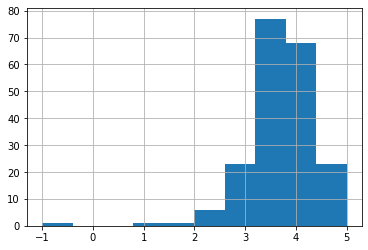

In [56]:
df.Rating.hist()

In [61]:
df.rename(columns = {'avg salary':'avg_salary'},inplace=True)

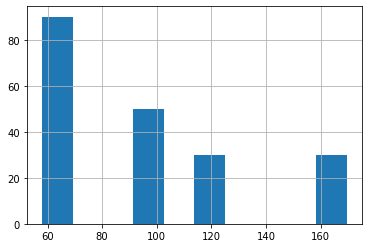

In [63]:
df.avg_salary.hist()

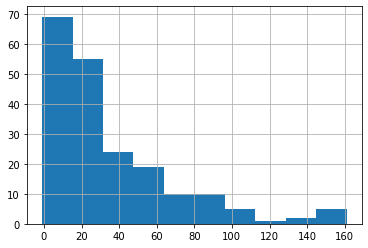

In [64]:
df.age.hist()

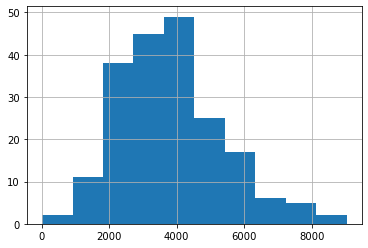

In [69]:
df.dsc_len.hist()

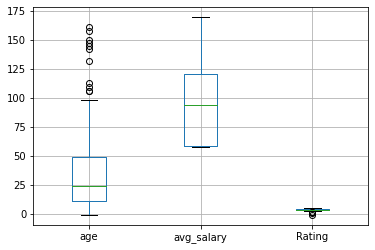

In [72]:
df.boxplot(column = ['age','avg_salary','Rating'])

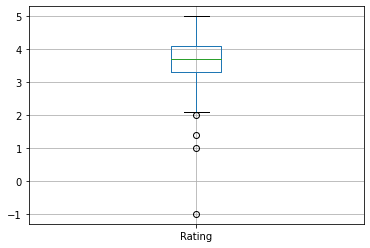

In [73]:
df.boxplot(column = 'Rating')

In [74]:
df[['age','avg_salary','Rating','dsc_len']].corr()

,age,avg_salary,Rating,dsc_len
age,1.000000,0.115176,-0.016774,-0.012857
avg_salary,0.115176,1.000000,0.036711,0.015758
Rating,-0.016774,0.036711,1.000000,-0.074528
dsc_len,-0.012857,0.015758,-0.074528,1.000000


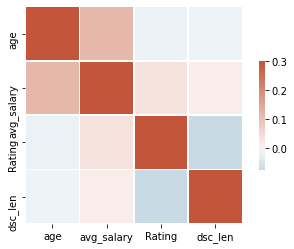

In [84]:
#generate custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#heatmap
sns.heatmap(df[['age','avg_salary','Rating','dsc_len']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [89]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'num_comp', 'dsc_len',
       'job_simplified', 'seniority'],
      dtype='object')

In [93]:
#Catergorical Data
df_cat = df[['Location','Headquarters','Size','Type of ownership', 'Industry','Sector','Revenue','company_txt','job_state','same_state','python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simplified', 'seniority']]

graph for Location: total = 127


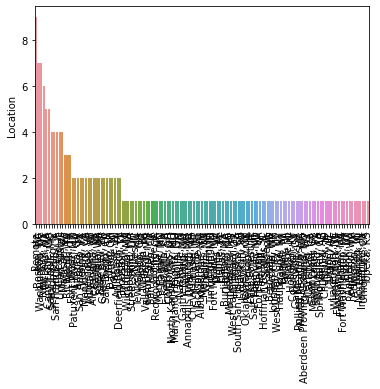

graph for Headquarters: total = 1


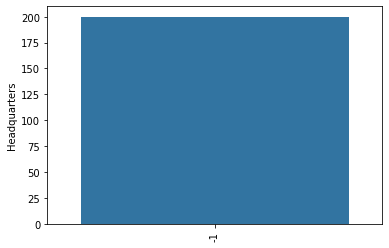

graph for Size: total = 8


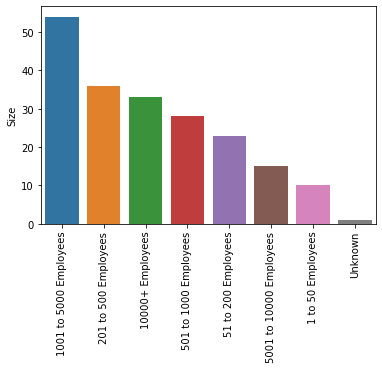

graph for Type of ownership: total = 8


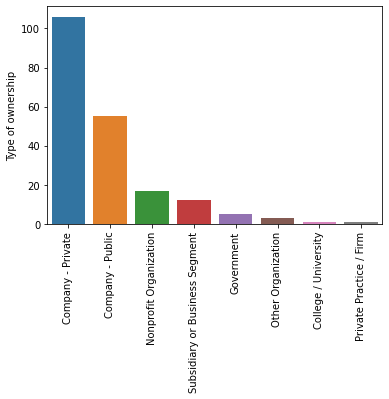

graph for Industry: total = 46


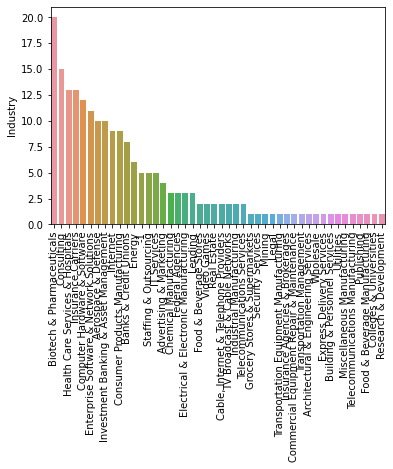

graph for Sector: total = 20


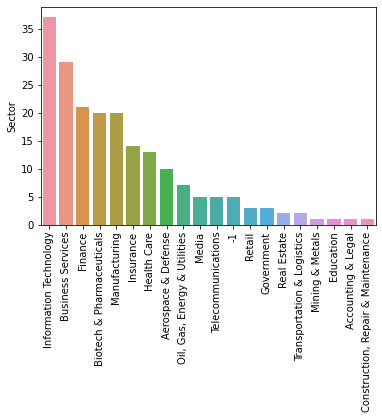

graph for Revenue: total = 13


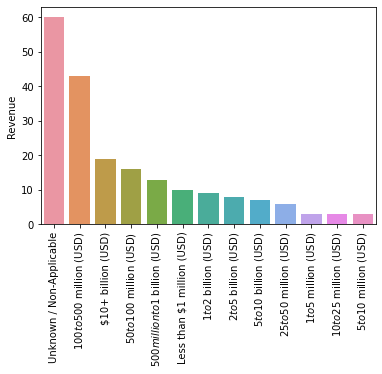

graph for company_txt: total = 177


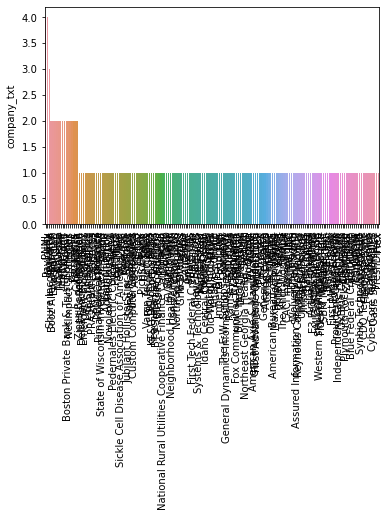

graph for job_state: total = 32


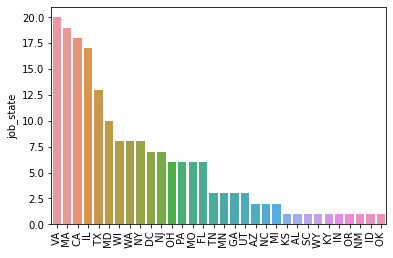

graph for same_state: total = 1


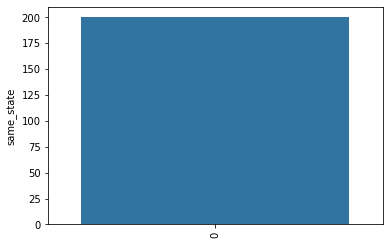

graph for python_yn: total = 2


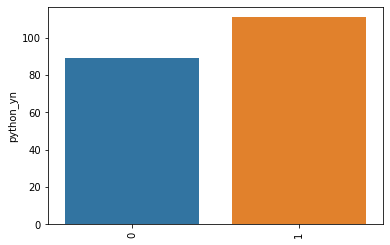

graph for R_yn: total = 1


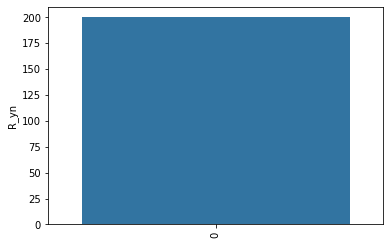

graph for spark: total = 2


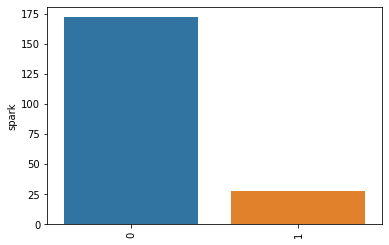

graph for aws: total = 2


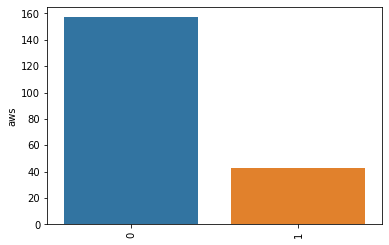

graph for excel: total = 2


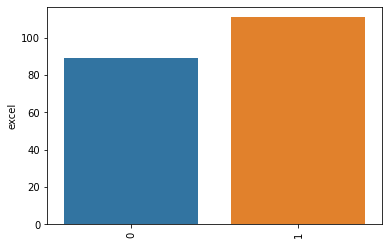

graph for job_simplified: total = 6


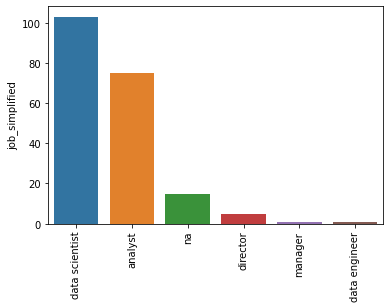

graph for seniority: total = 3


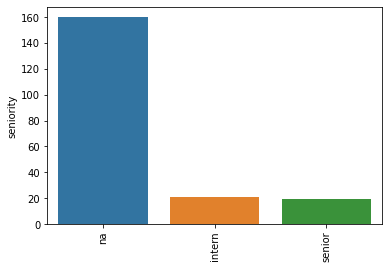

In [97]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


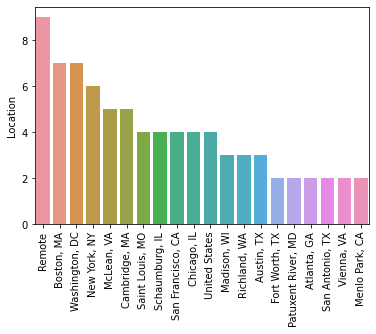

graph for Headquarters: total = 1


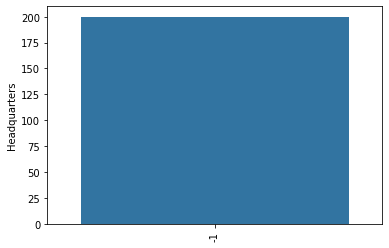

graph for company_txt: total = 20


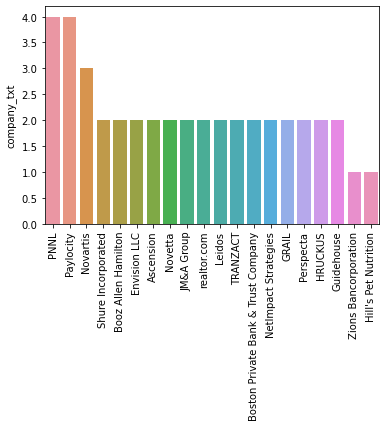

In [98]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [99]:
#pivot tables
pd.pivot_table(df, index = 'job_simplified', values = 'avg_salary')

,avg_salary
job_simplified,
analyst,89.086667
data engineer,58.000000
data scientist,101.470874
director,115.300000
manager,94.000000
na,71.966667


In [100]:
pd.pivot_table(df, index = ['job_simplified','seniority'], values = 'avg_salary')

avg_salary
job_simplified seniority            
analyst        intern      93.125000
               na          90.584615
               senior      70.166667
data engineer  intern      58.000000
data scientist intern     111.642857
               na         104.164706
               senior      74.181818
director       na         101.750000
               senior     169.500000
manager        na          94.000000
na             intern      66.500000
               na          77.400000
               senior      94.000000

In [101]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
KS,121.000000
NM,121.000000
MA,119.131579
UT,112.000000
PA,108.083333
MN,107.333333
MO,103.250000
CA,102.722222
OH,99.166667


In [104]:
pd.set_option('display.max_rows', None)

In [108]:
pd.pivot_table(df, index = ['job_state','job_simplified'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state',ascending = False)

avg_salary
job_state job_simplified            
 WY       analyst                  1
 WI       na                       2
          data scientist           2
          analyst                  4
 WA       data scientist           4
          analyst                  4
 VA       na                       1
          data scientist          12
          analyst                  7
 UT       na                       1
          data scientist           1
          analyst                  1
 TX       data scientist           9
          analyst                  4
 TN       data scientist           2
          analyst                  1
 SC       analyst                  1
 PA       director                 1
          data scientist           2
          analyst                  3
 OR       analyst                  1
 OK       analyst                  1
 OH       data scientist           4
          analyst                  2
 NY       director                 1
          data scientist           4
          analyst                  3
 NM       analyst                  1
 NJ       na                       2
          data scientist           2
          analyst                  3
 NC       na                       1
          data scientist           1
 MO       data scientist           5
          analyst                  1
 MN       na                       1
          manager                  1
          data scientist           1
 MI       na                       1
          analyst                  1
 MD       na                       2
          data scientist           5
          analyst                  3
 MA       director                 1
          data scientist          11
          analyst                  7
 KY       analyst                  1
 KS       data scientist           1
 IN       na                       1
 IL       na                       2
          data scientist           9
          data engineer            1
          analyst                  5
 ID       analyst                  1
 GA       data scientist           1
          analyst                  2
 FL       data scientist           2
          analyst                  4
 DC       director                 1
          data scientist           5
          analyst                  1
 CA       analyst                  6
          director                 1
          data scientist          11
 AZ       analyst                  2
 AL       analyst                  1

In [110]:
pd.pivot_table(df[df.job_simplified == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
MN,169.500000
UT,121.000000
KS,121.000000
TN,116.500000
MA,115.363636
CA,115.000000
MO,111.200000
OH,103.875000
IL,103.611111


In [112]:
#rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark,aws,excel,desc_len, Type of ownership
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'num_comp', 'dsc_len',
       'job_simplified', 'seniority'],
      dtype='object')

In [116]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided_salary', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'dsc_len', 'Type of ownership','avg_salary']]

In [119]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i, values='avg_salary').sort_values(i, ascending=False))

Rating
        avg_salary
Rating            
 5.0     94.000000
 4.9    110.625000
 4.8    169.500000
 4.7    169.500000
 4.6     87.500000
 4.5     95.375000
 4.4    118.000000
 4.3     97.950000
 4.2     81.850000
 4.1     89.187500
 4.0     88.000000
 3.9     97.687500
 3.8    103.400000
 3.7    106.727273
 3.6     91.472222
 3.5     92.906250
 3.4    110.363636
 3.3     93.142857
 3.2     67.214286
 3.1    115.250000
 3.0     67.428571
 2.9     99.100000
 2.8     94.000000
 2.7     76.100000
 2.6     58.500000
 2.5     70.333333
 2.4     58.500000
 2.1    121.000000
 2.0     94.000000
 1.4     94.000000
 1.0     94.000000
-1.0    169.500000
Industry
                                           avg_salary
Industry                                             
Wholesale                                   94.000000
Video Games                                135.250000
Utilities                                   63.500000
Transportation Management                   58.000000
Transportation

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [120]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),5,4
$1 to $5 million (USD),1,2
$10 to $25 million (USD),1,2
$10+ billion (USD),9,10
$100 to $500 million (USD),19,24
$2 to $5 billion (USD),4,4
$25 to $50 million (USD),3,3
$5 to $10 billion (USD),4,3
$5 to $10 million (USD),2,1


In [128]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


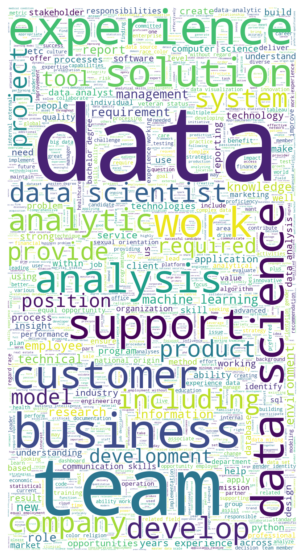

In [130]:
#word clouds for Job Description
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white",random_state=1,stopwords=STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()